In [1]:
import pandas as pd
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt
dt = pd.read_csv("reviews.csv", parse_dates=['Timestamp'])
dt.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


## por dia

In [2]:
dt['Day'] = dt['Timestamp'].dt.date
day_average = dt.groupby(['Day']).mean(numeric_only=True)
day_average.head()

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077


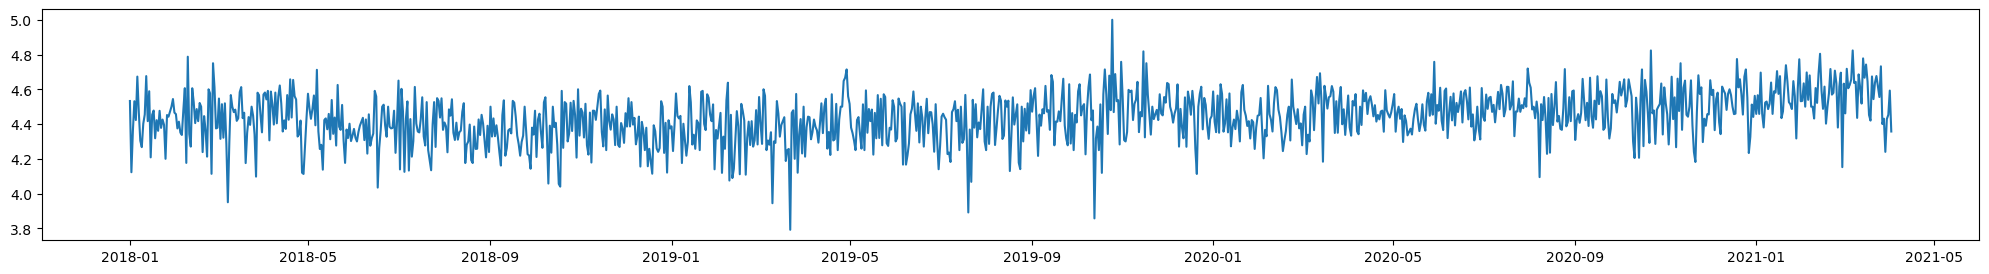

In [3]:
plt.figure(figsize=(25,3))
plt.plot(day_average.index, day_average['Rating'])

In [4]:
dt['Week'] = dt['Timestamp'].dt.isocalendar().week
dt['Week']

0        13
1        13
2        13
3        13
4        13
         ..
44995     1
44996     1
44997     1
44998     1
44999     1
Name: Week, Length: 45000, dtype: UInt32

## por mes

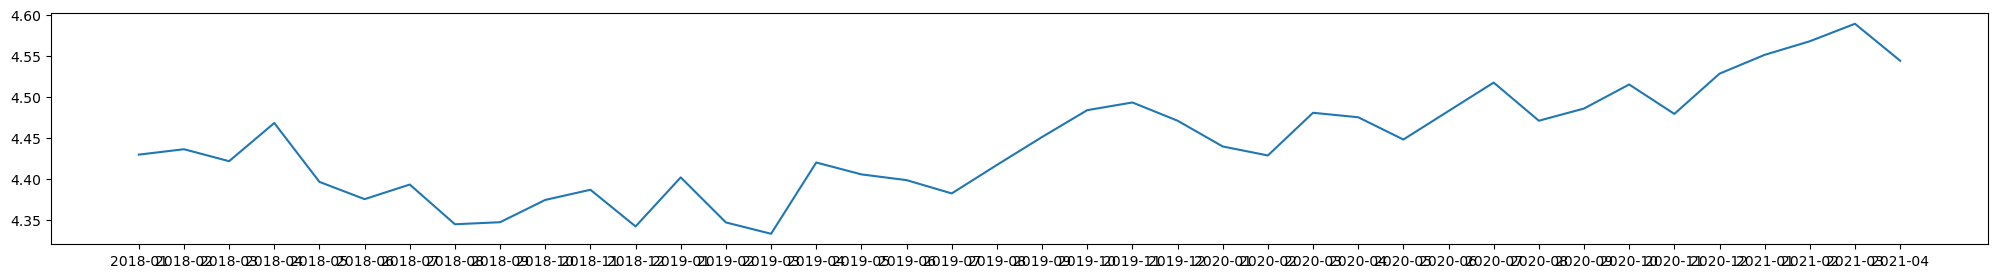

In [5]:
dt['Month'] = dt['Timestamp'].dt.strftime('%Y-%m')
Month_average = dt.groupby(['Month']).mean(numeric_only=True)
plt.figure(figsize=(25,3))
plt.plot(Month_average.index, Month_average['Rating'])

## promedio por mes por el curso

<Axes: xlabel='Month'>

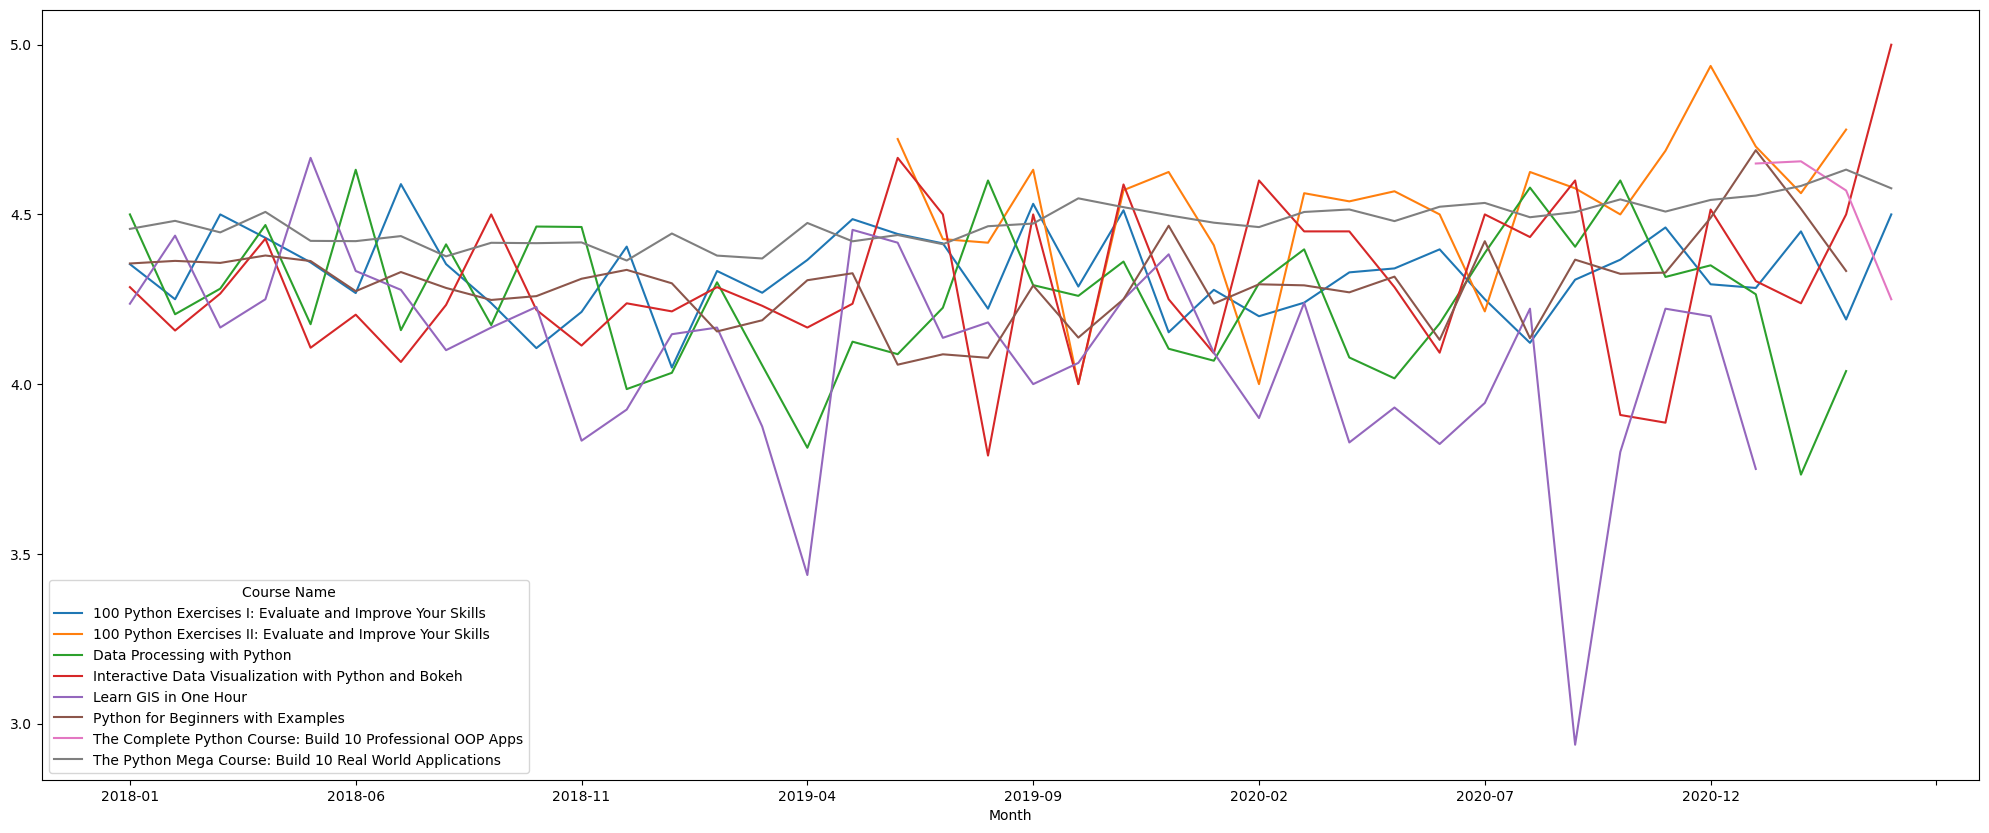

In [6]:
dt['Month'] = dt['Timestamp'].dt.strftime('%Y-%m')
Month_average_crs = dt.groupby(['Month','Course Name'])['Rating'].mean().unstack()
Month_average_crs.plot(figsize=(25,10))

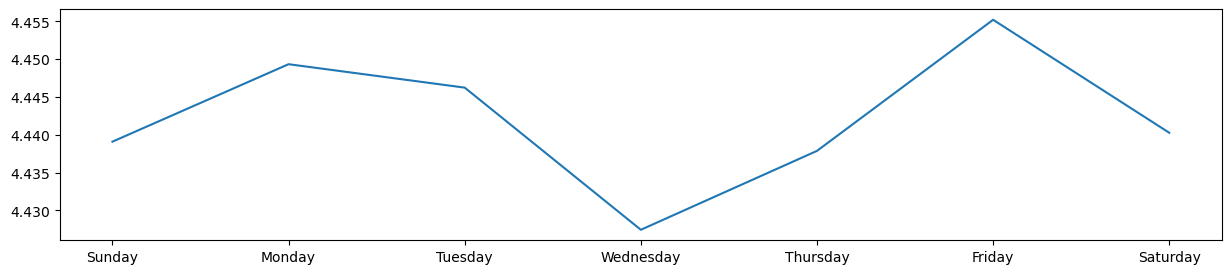

In [7]:
dt['Weekday'] = dt['Timestamp'].dt.strftime('%A')
dt['Daynumber'] = dt['Timestamp'].dt.strftime('%w')

Weekday_average = dt.groupby(['Weekday','Daynumber']).mean(numeric_only=True)
Weekday_average = Weekday_average.sort_values('Daynumber')

plt.figure(figsize=(15,3))
plt.plot(Weekday_average.index.get_level_values(0), Weekday_average['Rating'])

### Grafica circulo

In [12]:
shara = dt.groupby(['Course Name'])['Rating'].count()
shara

Course Name
100 Python Exercises I: Evaluate and Improve Your Skills       1593
100 Python Exercises II: Evaluate and Improve Your Skills       280
Data Processing with Python                                     868
Interactive Data Visualization with Python and Bokeh            767
Learn GIS in One Hour                                           499
Python for Beginners with Examples                             4821
The Complete Python Course: Build 10 Professional OOP Apps      470
The Python Mega Course: Build 10 Real World Applications      35702
Name: Rating, dtype: int64

([<matplotlib.patches.Wedge at 0x254c663d710>,
 [Text(1.0932045021416132, 0.12208159770132226, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539537181753, 0.26357987923534204, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237552357248, 0.34823392570193146, 'Data Processing with Python'),
  Text(0.9969710234481678, 0.46481047579063145, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514707070057, 0.5509972750609822, 'Learn GIS in One Hour'),
  Text(0.6871674297354247, 0.858953388438983, 'Python for Beginners with Examples'),
  Text(0.3307031314068022, 1.0491117380325774, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.8762757995015485, -0.6649366309716455, 'The Python Mega Course: Build 10 Real World Applications')])

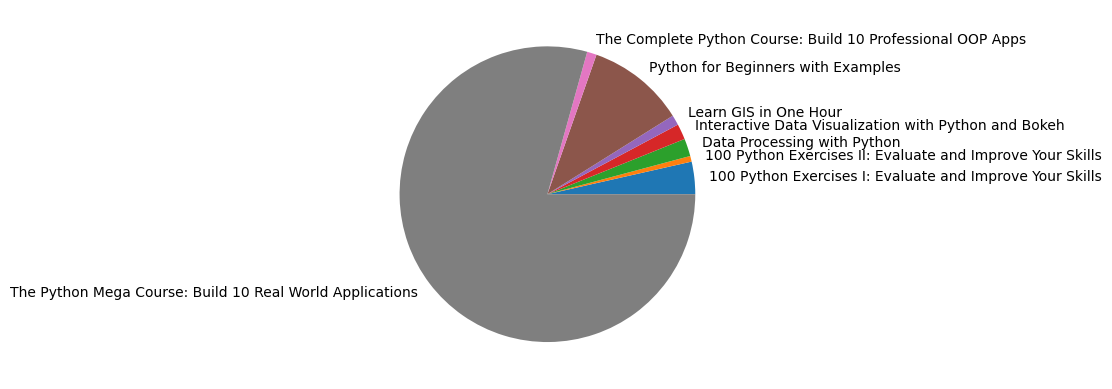

In [13]:
plt.pie(shara, labels=shara.index)